![title](logo.png)

   #          DATA                                        ANALYSIS

This is an exploratory data analysis of the German Football League (Bundesliga) since 1963. The dataset was extracted from 57 wikipedia pages. Each page was corresponding to one season's details, and was scraped with the open source tool: ParseHub

Being an avid football fan, I've been wanting to do this project for months. After the wonderful journey of one of my favorite football club (FC Bayern Munich) in the European Champions League, I decided to pay tribute to the team I've been cheering for since I was 9 years old by analyzing their national championship. So pick up your ball and follow me to the field of Data Analysis ;)

In [10]:
#Libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

In [2]:
#Load the dataset and preview of the 10 first rows
df= pd.read_csv('bundesliga.csv')
df.head()

,team_selection1,team_position,team_name,team_points,team_played,team_win,team_draw,team_loss,team_goals_for,team_goals_against
0,1963–64 Bundesliga,1,1. FC Köln,45,30,17,11,2,78,40
1,1963–64 Bundesliga,2,Meidericher SV,39,30,13,13,4,60,36
2,1963–64 Bundesliga,3,Eintracht Frankfurt,39,30,16,7,7,65,41
3,1963–64 Bundesliga,4,Borussia Dortmund,33,30,14,5,11,73,57
4,1963–64 Bundesliga,5,VfB Stuttgart,33,30,13,7,10,48,40


In [3]:
#Preview of the 10 last rows
df.tail()

,team_selection1,team_position,team_name,team_points,team_played,team_win,team_draw,team_loss,team_goals_for,team_goals_against
1019,2019–20 Bundesliga,14,1. FC Köln,36,34,10,6,18,51,69
1020,2019–20 Bundesliga,15,FC Augsburg,36,34,9,9,16,45,63
1021,2019–20 Bundesliga,16,Werder Bremen,31,34,8,7,19,42,69
1022,2019–20 Bundesliga,17,Fortuna Düsseldorf,30,34,6,12,16,36,67
1023,2019–20 Bundesliga,18,SC Paderborn,20,34,4,8,22,37,74


In [4]:
#Number of rows and columns
df.shape

(1024, 10)

### Renaming the columns


In [5]:
df.columns

Index(['team_selection1', 'team_position', 'team_name', 'team_points',
       'team_played', 'team_win', 'team_draw', 'team_loss', 'team_goals_for',
       'team_goals_against'],
      dtype='object')

In [6]:
df = df.rename(columns={'team_selection1' :'season', 'team_position': 'position', 'team_name': 'club', 'team_points':'points',
       'team_played':'played', 'team_win': 'win', 'team_draw': 'draw', 'team_loss':'loss', 'team_goals_for': 'GF',
       'team_goals_against':'GA'})
df.head()

,season,position,club,points,played,win,draw,loss,GF,GA
0,1963–64 Bundesliga,1,1. FC Köln,45,30,17,11,2,78,40
1,1963–64 Bundesliga,2,Meidericher SV,39,30,13,13,4,60,36
2,1963–64 Bundesliga,3,Eintracht Frankfurt,39,30,16,7,7,65,41
3,1963–64 Bundesliga,4,Borussia Dortmund,33,30,14,5,11,73,57
4,1963–64 Bundesliga,5,VfB Stuttgart,33,30,13,7,10,48,40


In [7]:
#create GD: goal difference column
df['GD']= df['GF']-df['GA']
df.head()

,season,position,club,points,played,win,draw,loss,GF,GA,GD
0,1963–64 Bundesliga,1,1. FC Köln,45,30,17,11,2,78,40,38
1,1963–64 Bundesliga,2,Meidericher SV,39,30,13,13,4,60,36,24
2,1963–64 Bundesliga,3,Eintracht Frankfurt,39,30,16,7,7,65,41,24
3,1963–64 Bundesliga,4,Borussia Dortmund,33,30,14,5,11,73,57,16
4,1963–64 Bundesliga,5,VfB Stuttgart,33,30,13,7,10,48,40,8


In [8]:
#Quick stats
df.describe()

,position,played,win,draw,loss,GF,GA,GD
count,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000
mean,9.488281,33.919922,12.620117,8.694336,12.605469,51.909180,51.875977,0.033203
std,5.190398,1.391720,4.422818,2.793885,4.346054,13.958553,12.569309,21.615879
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-93.000000
25%,5.000000,34.000000,9.000000,7.000000,10.000000,42.000000,43.000000,-14.000000
50%,9.000000,34.000000,12.000000,9.000000,13.000000,49.000000,51.000000,-2.000000
75%,14.000000,34.000000,15.000000,11.000000,15.000000,61.000000,60.000000,13.000000
max,20.000000,38.000000,29.000000,18.000000,28.000000,101.000000,108.000000,80.000000


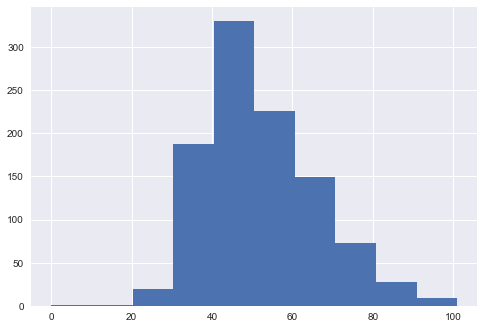

In [9]:
df['GF'].hist()

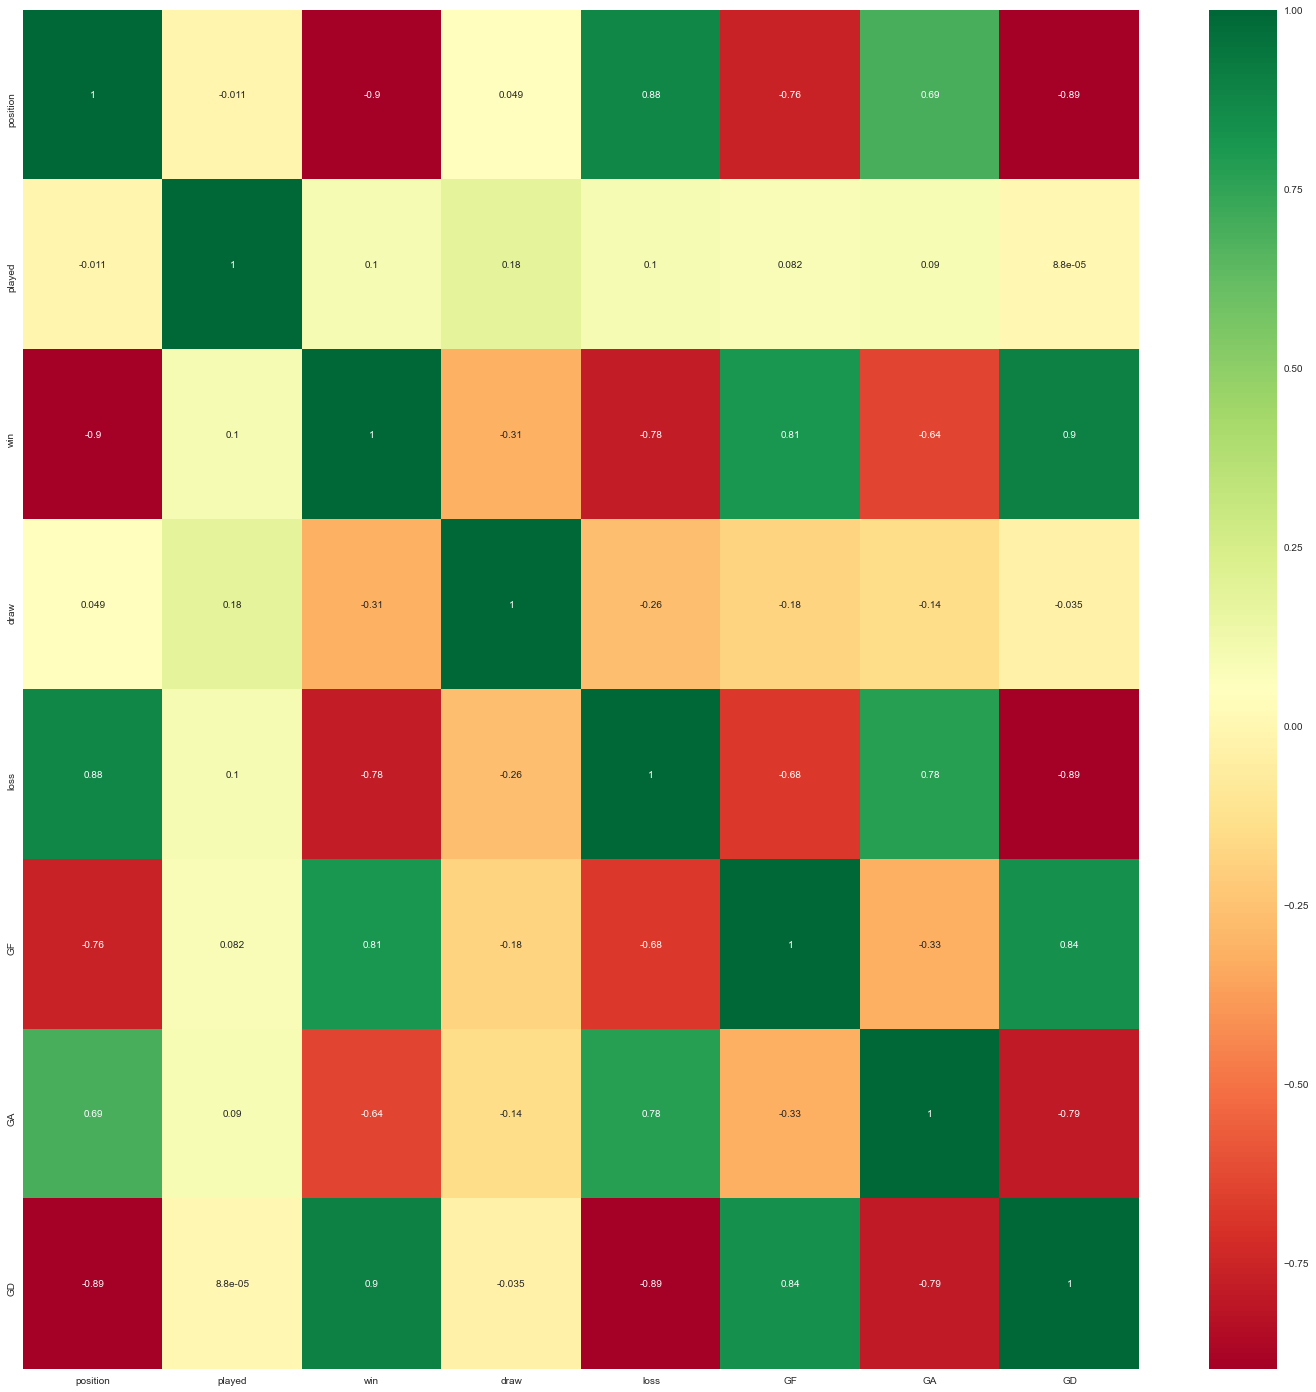

In [11]:
#correlation
plt.figure(figsize=(25,25))
hm= sns.heatmap(df.corr(), annot= True, cmap= "RdYlGn")

We can clearly see the correlation between the position and number of wins, losses, draws

### Checking if we have different names for the same club

In [9]:
df['club'].unique()

array(['1. FC Köln', 'Meidericher SV', 'Eintracht Frankfurt',
       'Borussia Dortmund', 'VfB Stuttgart', 'Hamburger SV',
       'TSV 1860 Munich', 'FC Schalke 04', '1. FC Nürnberg',
       'SV Werder Bremen', 'Eintracht Braunschweig',
       '1. FC Kaiserslautern', 'Karlsruher SC', 'Hertha BSC',
       'SC Preußen Münster', '1. FC Saarbrücken', 'Hannover 96',
       'Borussia Neunkirchen', 'TSV 1860 München', 'FC Bayern Munich',
       'Borussia Mönchengladbach', 'Tasmania Berlin', '1860 Munich',
       'Bayern Munich', 'MSV Duisburg', 'Schalke 04', 'Werder Bremen',
       'Fortuna Düsseldorf', 'Rot-Weiss Essen', 'Alemannia Aachen',
       'Kickers Offenbach', 'Rot-Weiß Oberhausen', 'Arminia Bielefeld',
       'VfL Bochum', 'Wuppertaler SV', 'Fortuna Köln',
       'Tennis Borussia Berlin', 'Bayer 05 Uerdingen', 'FC St. Pauli',
       'SV Darmstadt 98', 'Bayer Leverkusen', 'Darmstadt 98',
       'Waldhof Mannheim', 'FC Homburg', 'Blau-Weiß 90 Berlin',
       'Stuttgarter Kickers', 'FC

We noticed that some club names have changed through the years  
Let's create a dictionary and apply it to the club column

In [10]:
#All the different names
#TSV 1860 Munich = 1860 Munich= TSV1860 Munchen
#'Meidericher SV' = 'MSV Duisburg'
# Werder Bremen = SV Werder Bremen
# FC Bayern Munich = 'Bayern' = Bayern Munich
# FC Schalke 04 = Schalke 04
# SV Darmstadt = Darmstadt 98
# FC Homburg = FC 08 Homburg
# KFC Uerdingen = Bayer 05 Uerdinge
# Mainz 05 = FSV Mainz 05
#Paderborn 07 = SC Paderborn

In [11]:
final_names = {'1860 Munich': 'TSV 1860 Munich', 'TSV 1860 München': 'TSV 1860 Munich', 'Meidericher SV': 'MSV Duisburg',
              'SV Werder Bremen': 'Werder Bremen', 'Bayern': 'FC Bayern Munich', 'Bayern Munich': 'FC Bayern Munich',
              'Schalke 04' : 'FC Schalke 04', 'Darmstadt 98': 'SV Darmstadt', 'FC Homburg': 'FC 08 Homburg',
              'Bayer 05 Uerdingen': 'KFC Uerdingen', 'Mainz 05': 'FSV Mainz 05', 'SC Paderborn': 'SC Paderborn 07'}

df.club.replace(final_names, inplace=True)

### Creation of a city column for each club


In [12]:
#Get the list of all clubs
df['club'].unique()

array(['1. FC Köln', 'MSV Duisburg', 'Eintracht Frankfurt',
       'Borussia Dortmund', 'VfB Stuttgart', 'Hamburger SV',
       'TSV 1860 Munich', 'FC Schalke 04', '1. FC Nürnberg',
       'Werder Bremen', 'Eintracht Braunschweig', '1. FC Kaiserslautern',
       'Karlsruher SC', 'Hertha BSC', 'SC Preußen Münster',
       '1. FC Saarbrücken', 'Hannover 96', 'Borussia Neunkirchen',
       'FC Bayern Munich', 'Borussia Mönchengladbach', 'Tasmania Berlin',
       'Fortuna Düsseldorf', 'Rot-Weiss Essen', 'Alemannia Aachen',
       'Kickers Offenbach', 'Rot-Weiß Oberhausen', 'Arminia Bielefeld',
       'VfL Bochum', 'Wuppertaler SV', 'Fortuna Köln',
       'Tennis Borussia Berlin', 'KFC Uerdingen', 'FC St. Pauli',
       'SV Darmstadt 98', 'Bayer Leverkusen', 'SV Darmstadt',
       'Waldhof Mannheim', 'FC 08 Homburg', 'Blau-Weiß 90 Berlin',
       'Stuttgarter Kickers', 'SG Wattenscheid 09', 'Dynamo Dresden',
       'Hansa Rostock', 'SC Freiburg', 'VfB Leipzig', 'VfL Wolfsburg',
       'SpVg

In [13]:
#create a dictionary each club for each city
club_city= {'1. FC Köln': 'Cologne',
                'MSV Duisburg': 'Duisburg',
                'Eintracht Frankfurt':'Frankfurt',
                'Meidericher SV': 'Duisburg',
                'Borussia Dortmund': 'Dortmund',
                'VfB Stuttgart':'Stuttgart',
                'Hamburger SV': 'Hamburg',
                'TSV 1860 Munich':'Munich',
                'FC Schalke 04': 'Gelsenkirchen',
                '1. FC Nürnberg': 'Nuremberg',
                'Werder Bremen': 'Bremen',
                'Eintracht Braunschweig': 'Braunschweig',
                '1. FC Kaiserslautern': 'Kaiserslautern',
                'Karlsruher SC': 'Karlsruhe',
                'Hertha BSC': 'Berlin',
                'SC Preußen Münster':'Münster',
                '1. FC Saarbrücken': 'Saarbrücken',
                'Hannover 96':'Hanover',
                'Borussia Neunkirchen': 'Neunkirchen',
                'FC Bayern Munich':'Munich',
                'Borussia Mönchengladbach': 'Mönchengladbach',
                'Tasmania Berlin': 'Berlin',
                'Fortuna Düsseldorf': 'Düsseldorf',
                'Rot-Weiss Essen': 'Essen', 
                'Alemannia Aachen': 'Aachen',
                'Kickers Offenbach':'Offenbach',
                'Rot-Weiß Oberhausen': 'Oberhausen', 
                'Arminia Bielefeld': 'Bielefeld',
                'VfL Bochum': 'Bochum',
                'Wuppertaler SV': 'Wuppertal',
                'Fortuna Köln': 'Cologne',
                'Tennis Borussia Berlin': 'Berlin',
                'KFC Uerdingen': 'Krefeld', #district of krefeld
                'FC St. Pauli': 'Hamburg', #District of Hamburg
                'SV Darmstadt 98': 'Darmstadt',
                'Bayer Leverkusen': 'Leverkusen',
                'SV Darmstadt': 'Darmstadt',
                'Waldhof Mannheim': 'Mannheim',
                'FC 08 Homburg': 'Homburg', 
                'Blau-Weiß 90 Berlin': 'Berlin',
                'Stuttgarter Kickers': 'Stuttgart',
                'SG Wattenscheid 09':'Bochum', #district of Bochum
                'Dynamo Dresden': 'Dresden',
                'Hansa Rostock': 'Rostock',
                'SC Freiburg': 'Freiburg', 
                'VfB Leipzig': 'Leipzig',
                'VfL Wolfsburg': 'Wolfsburg',
                'SpVgg Unterhaching': 'Unterhaching',
                'SSV Ulm 1846':'Ulm',
                'Energie Cottbus':'Cottbus',
                'FSV Mainz 05': 'Mainz',
                '1899 Hoffenheim':'Sinsheim', 
                'FC Augsburg': 'Augsburg',
                'SpVgg Greuther Fürth': 'Fürth',
                'SC Paderborn 07': 'Paderborn', 
                'FC Ingolstadt': 'Ingolstadt',
                'RB Leipzig': 'Leipzig', 
                'Union Berlin':'Berlin'}

In [14]:
df['city']= df['club'].map(club_city)
df.head()

,season,position,club,points,played,win,draw,loss,GF,GA,GD,city
0,1963–64 Bundesliga,1,1. FC Köln,45,30,17,11,2,78,40,38,Cologne
1,1963–64 Bundesliga,2,MSV Duisburg,39,30,13,13,4,60,36,24,Duisburg
2,1963–64 Bundesliga,3,Eintracht Frankfurt,39,30,16,7,7,65,41,24,Frankfurt
3,1963–64 Bundesliga,4,Borussia Dortmund,33,30,14,5,11,73,57,16,Dortmund
4,1963–64 Bundesliga,5,VfB Stuttgart,33,30,13,7,10,48,40,8,Stuttgart


In [15]:
#Remove the word 'Bundesliga' in season column
df['season']= df['season'].apply(lambda x : x.split(' ')[0])
df['season'].head()

0    1963–64
1    1963–64
2    1963–64
3    1963–64
4    1963–64
Name: season, dtype: object

In [16]:
df.to_csv('best_liga.csv', index=False)

### MAP OF THE PARTICIPANTS (done with TABLEAU)

![title](cities.png)

### FEW CHANGES

In [17]:
#Types of the columns
df.dtypes

season      object
position     int64
club        object
points      object
played       int64
win          int64
draw         int64
loss         int64
GF           int64
GA           int64
GD           int64
city        object
dtype: object

In [18]:
#We note that the points column's type is object when it should be integer
#Let's check the values

In [19]:
df.points.unique()

array(['45', '39', '33', '32', '31', '29', '28', '26', '24', '23', '17',
       '41', '38', '36', '35', '27', '25', '22', '50', '47', '44', '34',
       '30', '8', '43', '37', '42', '19', '46', '51', '48', '55', '52',
       '20', '0', '54', '40', '49', '16', '12', '18', '21', '53', '14',
       '68', '62', '56', '71', '69', '63', '61', '66', '78', '57', '73',
       '59', '39[b]', '58', '70', '75', '74', '65', '64', '77', '60',
       '76', '67', '81', '91', '90', '79', '88', '82', '84'], dtype=object)

In [20]:
#We have to remove the [b] character
df['points']= df['points'].apply(lambda x :x.replace('[b]',''))

In [21]:
#And change the type of the column
df['points']= df['points'].astype('int64')
df.dtypes

season      object
position     int64
club        object
points       int64
played       int64
win          int64
draw         int64
loss         int64
GF           int64
GA           int64
GD           int64
city        object
dtype: object

### BUNDESLIGA WINNERS

In [22]:
#Bundesliga winners
champ = df[df['position']==1].club.value_counts()
champ

FC Bayern Munich            29
Borussia Dortmund            5
Borussia Mönchengladbach     5
Werder Bremen                4
VfB Stuttgart                3
Hamburger SV                 3
1. FC Kaiserslautern         2
1. FC Köln                   2
Eintracht Braunschweig       1
VfL Wolfsburg                1
TSV 1860 Munich              1
1. FC Nürnberg               1
Name: club, dtype: int64

Text(0, 0.5, 'Teams')

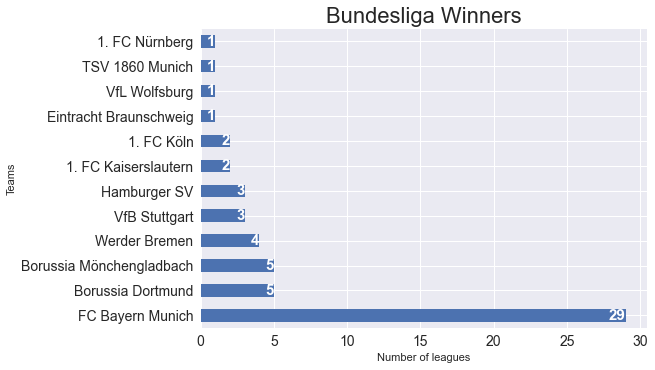

In [23]:
#Plot 
for elem, value in enumerate(champ):
    plt.text(value, elem, str(value), horizontalalignment='right', verticalalignment= 'center', weight= 'bold', color='white', fontsize=15)  
champ.plot(kind='barh')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Bundesliga Winners', fontsize=22)
plt.xlabel('Number of leagues')
plt.ylabel('Teams')

We can see that FC Bayern Munich is the most dominant club in German Football history with 29 titles!!  
Dortmund and Monchengladbach share the 2nd place and Werder Bremen is 3rd  
Let's try to find out when FC Nürnberg, Eintracht Braunschweig, Wolfsburg and TSV 1860 Munich won the Bundesliga  

![izi life](champions.png)

In [24]:
# Years of the one time champs
unique_champ = ['1. FC Nürnberg','Eintracht Braunschweig', 'VfL Wolfsburg', 'TSV 1860 Munich']
df[(df['position']== 1) & (df['club'].isin(unique_champ))]

,season,position,club,points,played,win,draw,loss,GF,GA,GD,city
32,1965–66,1,TSV 1860 Munich,50,34,20,10,4,80,40,40,Munich
50,1966–67,1,Eintracht Braunschweig,43,34,17,9,8,49,27,22,Braunschweig
68,1967–68,1,1. FC Nürnberg,47,34,19,9,6,71,37,34,Nuremberg
808,2008–09,1,VfL Wolfsburg,69,34,21,6,7,80,41,39,Wolfsburg


In [25]:
# Was some teams INVICIBLE ?
# Years of invicibility
df[df['loss'] ==0]

,season,position,club,points,played,win,draw,loss,GF,GA,GD,city
157,1971–72,18,Arminia Bielefeld,0,0,0,0,0,0,0,0,Bielefeld


Apparently not...  
Arminia Bielefeld were demoted by the DFB for playing a key role in the 1971 match fixing scandal. Their record (6 wins, 7 draws, 21 losses, 41–75 goals, 19 points) was expunged, though their final position would have remained the same

https://en.wikipedia.org/wiki/1971_Bundesliga_scandal

### BUNDESLIGA SECONDS

In [26]:
# 2nd position
second = df[df['position']==2].club.value_counts()
second

FC Bayern Munich            10
Werder Bremen                7
Borussia Dortmund            7
FC Schalke 04                7
Hamburger SV                 5
Bayer Leverkusen             5
1. FC Köln                   5
Borussia Mönchengladbach     2
VfB Stuttgart                2
Hertha BSC                   1
MSV Duisburg                 1
RB Leipzig                   1
VfL Wolfsburg                1
TSV 1860 Munich              1
1. FC Kaiserslautern         1
Alemannia Aachen             1
Name: club, dtype: int64

Text(0, 0.5, 'Number of times')

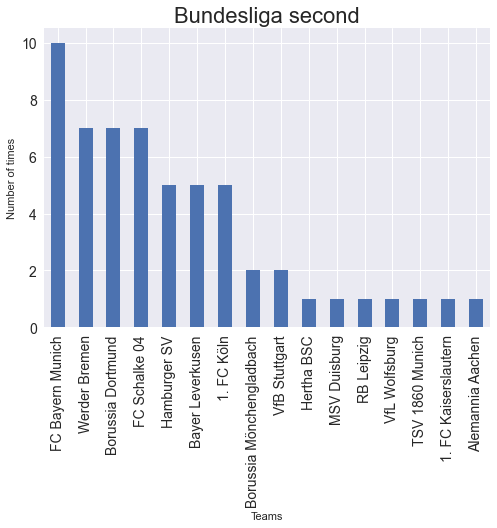

In [27]:
#Plot    
second.plot(kind='bar')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Bundesliga second', fontsize=22)
plt.xlabel('Teams')
plt.ylabel('Number of times')

### EVOLUTION OF THE NUMBER OF TEAMS PER SEASON

Text(0, 0.5, 'Number of teams')

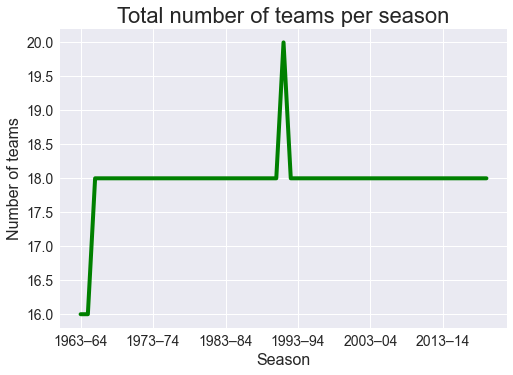

In [28]:
# number of german teams per season
number_clubs = df.groupby('season').count().club
#plot the results using a line plot
number_clubs.plot(linewidth=4, color='g')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#title and labels
plt.title('Total number of teams per season', fontsize=22)
plt.xlabel('Season', fontsize=16)
plt.ylabel('Number of teams', fontsize=16)

### GOALS SCORED THE LAST 10 YEARS

In [29]:
df['season'].unique()

array(['1963–64', '1964–65', '1965–66', '1966–67', '1967–68', '1968–69',
       '1969–70', '1970–71', '1971–72', '1972–73', '1973–74', '1974–75',
       '1975–76', '1976–77', '1977–78', '1978–79', '1979–80', '1980–81',
       '1981–82', '1982–83', '1983–84', '1984–85', '1985–86', '1986–87',
       '1987–88', '1988–89', '1989–90', '1990–91', '1991–92', '1992–93',
       '1993–94', '1994–95', '1995–96', '1996–97', '1997–98', '1998–99',
       '1999–2000', '2000–01', '2001–02', '2002–03', '2003–04', '2004–05',
       '2005–06', '2006–07', '2007–08', '2008–09', '2009–10', '2010–11',
       '2011–12', '2012–13', '2013–14', '2014–15', '2015–16', '2016–17',
       '2017–18', '2018–19', '2019–20'], dtype=object)

Text(0, 0.5, 'Goals')

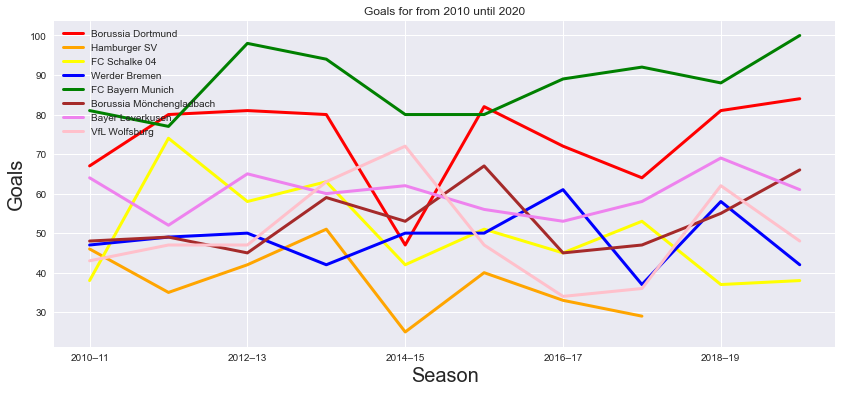

In [30]:
gf = df.pivot(index='season', columns='club', values='GF')
seasons= [ '2010–11','2011–12', '2012–13', '2013–14', '2014–15', '2015–16', '2016–17',
       '2017–18', '2018–19', '2019–20']
teams= ['Borussia Dortmund', 'Hamburger SV',
       'FC Schalke 04', 
       'Werder Bremen',
       'FC Bayern Munich', 'Borussia Mönchengladbach', 
        'Bayer Leverkusen','VfL Wolfsburg']

colors= ['red', 'orange', 'yellow', 'blue', 'green', 'brown', 'violet', 'pink', 'darkblue']
gf.loc[seasons,teams].plot(linewidth=3, color= colors, figsize=(14,6))
plt.legend(fontsize=10, loc='upper left')
plt.title('Goals for from 2010 until 2020')
plt.xlabel('Season', fontsize=20)
plt.ylabel('Goals', fontsize=20)

In [31]:
#Overall wins by club since 1963
df.groupby('club').win.describe()

,count,mean,std,min,25%,50%,75%,max
club,,,,,,,,
1. FC Kaiserslautern,44.0,13.045455,3.497205,4.0,10.75,13.0,16.00,19.0
1. FC Köln,48.0,13.312500,3.887548,5.0,10.75,13.0,17.00,22.0
1. FC Nürnberg,33.0,10.424242,3.192083,3.0,8.00,11.0,12.00,19.0
1. FC Saarbrücken,5.0,6.400000,1.516575,5.0,6.00,6.0,6.00,9.0
1899 Hoffenheim,12.0,12.166667,2.622744,8.0,10.75,11.5,15.00,16.0
Alemannia Aachen,4.0,10.750000,4.787136,5.0,8.00,11.0,13.75,16.0
Arminia Bielefeld,17.0,9.000000,3.201562,0.0,8.00,10.0,11.00,12.0
Bayer Leverkusen,41.0,14.682927,3.622423,8.0,12.00,15.0,17.00,21.0
Blau-Weiß 90 Berlin,1.0,3.000000,NaN,3.0,3.00,3.0,3.00,3.0


In [32]:
# 15 Biggest scrores sinces 1963
top15gf= df.groupby('club').GF.sum().sort_values(ascending= False).head(15)
top15gf

club
FC Bayern Munich            4133
Borussia Dortmund           3216
Werder Bremen               3174
Borussia Mönchengladbach    3012
VfB Stuttgart               2969
Hamburger SV                2937
Eintracht Frankfurt         2706
1. FC Köln                  2668
FC Schalke 04               2582
Bayer Leverkusen            2352
1. FC Kaiserslautern        2348
Hertha BSC                  1767
VfL Bochum                  1602
1. FC Nürnberg              1428
Hannover 96                 1385
Name: GF, dtype: int64

### GOALS SCORED AGAINST IN THE LAST 10 YEARS

Text(0, 0.5, 'Goals')

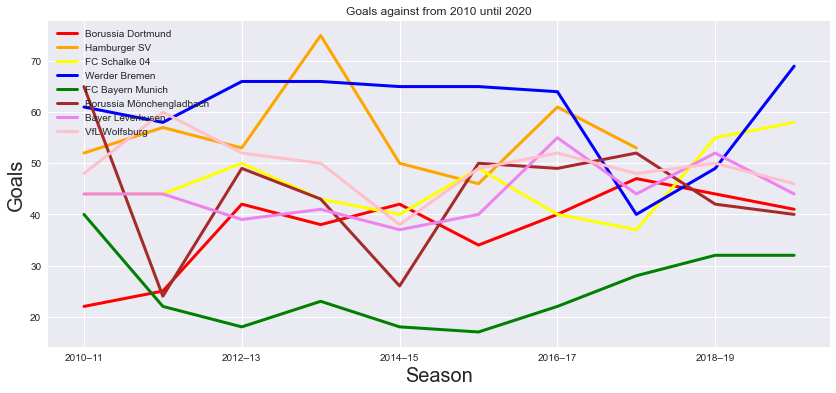

In [33]:
ga = df.pivot(index='season', columns='club', values='GA')
seasons= [ '2010–11',
       '2011–12', '2012–13', '2013–14', '2014–15', '2015–16', '2016–17',
       '2017–18', '2018–19', '2019–20']
teams= ['Borussia Dortmund', 'Hamburger SV',
       'FC Schalke 04', 
       'Werder Bremen',
       'FC Bayern Munich', 'Borussia Mönchengladbach', 
        'Bayer Leverkusen','VfL Wolfsburg']

colors= ['red', 'orange', 'yellow', 'blue', 'green', 'brown', 'violet', 'pink', 'darkblue']
ga.loc[seasons,teams].plot(linewidth=3, color= colors, figsize=(14,6))
plt.legend(fontsize=10, loc='upper left')
plt.title('Goals against from 2010 until 2020')
plt.xlabel('Season', fontsize=20)
plt.ylabel('Goals', fontsize=20)

In [34]:
top15ga = df.groupby('club').GA.sum().sort_values(ascending=False).head(15)
top15ga

club
Werder Bremen               2778
Eintracht Frankfurt         2680
Hamburger SV                2662
VfB Stuttgart               2628
Borussia Mönchengladbach    2561
Borussia Dortmund           2527
FC Schalke 04               2521
1. FC Köln                  2433
1. FC Kaiserslautern        2344
FC Bayern Munich            2033
Hertha BSC                  1910
VfL Bochum                  1887
Bayer Leverkusen            1872
1. FC Nürnberg              1794
Hannover 96                 1734
Name: GA, dtype: int64

Werder Bremen, Frankfirt and Hamburg have the worst defense of the Bundesliga history

# BUILDING THE ALL-TIME TABLE


In [35]:
#Number of wins
total_wins= df.groupby('club').win.sum()
total_wins= pd.DataFrame({'Teams': total_wins.index, 'WINS':total_wins.values})
total_wins.head()

,Teams,WINS
0,1. FC Kaiserslautern,574
1,1. FC Köln,639
2,1. FC Nürnberg,344
3,1. FC Saarbrücken,32
4,1899 Hoffenheim,146


In [36]:
#Years in Bundesliga
years= df['club'].value_counts()
years= pd.DataFrame({'Teams':years.index, 'YEARS': years.values}).sort_values(by='Teams')
years.head()

,Teams,YEARS
9,1. FC Kaiserslautern,44
8,1. FC Köln,48
13,1. FC Nürnberg,33
33,1. FC Saarbrücken,5
26,1899 Hoffenheim,12


In [37]:
#number of draws
total_draws= df.groupby('club').draw.sum()
total_draws= pd.DataFrame({'Teams': total_draws.index, 'DRAWS':total_draws.values}).sort_values(by='Teams')
total_draws.head()

,Teams,DRAWS
0,1. FC Kaiserslautern,374
1,1. FC Köln,413
2,1. FC Nürnberg,286
3,1. FC Saarbrücken,48
4,1899 Hoffenheim,119


In [38]:
#Biggest losers
total_losses= df.groupby('club').loss.sum()
total_losses= pd.DataFrame({'Teams': total_losses.index, 'LOSSES':total_losses.values}).sort_values(by='Teams')
total_losses.head()

,Teams,LOSSES
0,1. FC Kaiserslautern,544
1,1. FC Köln,576
2,1. FC Nürnberg,488
3,1. FC Saarbrücken,86
4,1899 Hoffenheim,143


In [39]:
#Number of goals for
total_gf= df.groupby('club').GF.sum()
total_gf= pd.DataFrame({'Teams': total_gf.index, 'TOTAL_GF':total_gf.values}).sort_values(by='Teams')
total_gf.head()

,Teams,TOTAL_GF
0,1. FC Kaiserslautern,2348
1,1. FC Köln,2668
2,1. FC Nürnberg,1428
3,1. FC Saarbrücken,202
4,1899 Hoffenheim,653


In [40]:
#Number of goals against
total_ga= df.groupby('club').GA.sum()
total_ga= pd.DataFrame({'Teams': total_ga.index, 'TOTAL_GA': total_ga.values}).sort_values(by='Teams')
total_ga.head()

,Teams,TOTAL_GA
0,1. FC Kaiserslautern,2344
1,1. FC Köln,2433
2,1. FC Nürnberg,1794
3,1. FC Saarbrücken,336
4,1899 Hoffenheim,624


In [41]:
#Number of games played
total_played= df.groupby('club').played.sum()
total_played= pd.DataFrame({'Teams': total_played.index, 'PLAYED':total_played.values}).sort_values(by='Teams')
total_played.head()

,Teams,PLAYED
0,1. FC Kaiserslautern,1492
1,1. FC Köln,1628
2,1. FC Nürnberg,1118
3,1. FC Saarbrücken,166
4,1899 Hoffenheim,408


In [42]:
#Number of goals diffrence
total_gd= df.groupby('club').GD.sum()
total_gd= pd.DataFrame({'Teams': total_gd.index, 'TOTAL_GD':total_gd.values}).sort_values(by='Teams')
total_gd.head()

,Teams,TOTAL_GD
0,1. FC Kaiserslautern,4
1,1. FC Köln,235
2,1. FC Nürnberg,-366
3,1. FC Saarbrücken,-134
4,1899 Hoffenheim,29


In [43]:
#total titles
total_titles = df[df['position']==1].club.value_counts()
total_titles= pd.DataFrame({'Teams': total_titles.index, 'TITLES':total_titles.values}).sort_values(by='Teams')
total_titles.head()

,Teams,TITLES
6,1. FC Kaiserslautern,2
7,1. FC Köln,2
11,1. FC Nürnberg,1
1,Borussia Dortmund,5
2,Borussia Mönchengladbach,5


In [44]:
dfs = [df.set_index(['Teams']) for df in [years,total_played, total_wins ,total_draws, total_losses, 
                                          total_gf, total_ga, total_gd, total_titles]]
best= pd.concat(dfs, axis=1).reset_index()
best.head()

,index,YEARS,PLAYED,WINS,DRAWS,LOSSES,TOTAL_GF,TOTAL_GA,TOTAL_GD,TITLES
0,1. FC Kaiserslautern,44,1492,574,374,544,2348,2344,4,2.0
1,1. FC Köln,48,1628,639,413,576,2668,2433,235,2.0
2,1. FC Nürnberg,33,1118,344,286,488,1428,1794,-366,1.0
3,1. FC Saarbrücken,5,166,32,48,86,202,336,-134,NaN
4,1899 Hoffenheim,12,408,146,119,143,653,624,29,NaN


In [45]:
best['WIN_PERCENTAGE']= round((best['WINS']/best['PLAYED'])*100, 2)
best.head()

,index,YEARS,PLAYED,WINS,DRAWS,LOSSES,TOTAL_GF,TOTAL_GA,TOTAL_GD,TITLES,WIN_PERCENTAGE
0,1. FC Kaiserslautern,44,1492,574,374,544,2348,2344,4,2.0,38.47
1,1. FC Köln,48,1628,639,413,576,2668,2433,235,2.0,39.25
2,1. FC Nürnberg,33,1118,344,286,488,1428,1794,-366,1.0,30.77
3,1. FC Saarbrücken,5,166,32,48,86,202,336,-134,NaN,19.28
4,1899 Hoffenheim,12,408,146,119,143,653,624,29,NaN,35.78


In [46]:
best.sort_values(by='WINS', ascending=False, inplace=True)
best['TEAMS']= best['index']
best.drop('index', axis=1, inplace=True)
best= best[['TEAMS','YEARS', 'PLAYED', 'WINS', 'DRAWS', 'LOSSES', 'TOTAL_GF',
       'TOTAL_GA', 'TOTAL_GD', 'TITLES', 'WIN_PERCENTAGE' ]]
best.head(15)

,TEAMS,YEARS,PLAYED,WINS,DRAWS,LOSSES,TOTAL_GF,TOTAL_GA,TOTAL_GD,TITLES,WIN_PERCENTAGE
18,FC Bayern Munich,55,1874,1120,409,345,4133,2033,2100,29.0,59.77
9,Borussia Dortmund,53,1798,805,460,533,3216,2527,689,5.0,44.77
55,Werder Bremen,56,1900,793,476,631,3174,2778,396,4.0,41.74
25,Hamburger SV,55,1866,746,495,625,2937,2662,275,3.0,39.98
51,VfB Stuttgart,53,1798,741,432,625,2969,2628,341,3.0,41.21
10,Borussia Mönchengladbach,52,1772,721,462,589,3012,2561,451,5.0,40.69
20,FC Schalke 04,52,1764,690,446,628,2582,2521,61,NaN,39.12
1,1. FC Köln,48,1628,639,413,576,2668,2433,235,2.0,39.25
14,Eintracht Frankfurt,51,1730,634,436,660,2706,2680,26,NaN,36.65
7,Bayer Leverkusen,41,1398,602,379,417,2352,1872,480,NaN,43.06


In [47]:
best['TITLES']= best['TITLES'].replace(np.nan, 0)
best['TITLES']= best['TITLES'].astype(int)
best.head(10)

,TEAMS,YEARS,PLAYED,WINS,DRAWS,LOSSES,TOTAL_GF,TOTAL_GA,TOTAL_GD,TITLES,WIN_PERCENTAGE
18,FC Bayern Munich,55,1874,1120,409,345,4133,2033,2100,29,59.77
9,Borussia Dortmund,53,1798,805,460,533,3216,2527,689,5,44.77
55,Werder Bremen,56,1900,793,476,631,3174,2778,396,4,41.74
25,Hamburger SV,55,1866,746,495,625,2937,2662,275,3,39.98
51,VfB Stuttgart,53,1798,741,432,625,2969,2628,341,3,41.21
10,Borussia Mönchengladbach,52,1772,721,462,589,3012,2561,451,5,40.69
20,FC Schalke 04,52,1764,690,446,628,2582,2521,61,0,39.12
1,1. FC Köln,48,1628,639,413,576,2668,2433,235,2,39.25
14,Eintracht Frankfurt,51,1730,634,436,660,2706,2680,26,0,36.65
7,Bayer Leverkusen,41,1398,602,379,417,2352,1872,480,0,43.06
